# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



1. Menginisiasi jumlah cluster secara random dengan menggunakan nilai k yang akan menjadi parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan.
2. Menentukan nilai centroid secara random
3. Menghitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat yang akan membentuk k cluster
4. Membuat centroid baru dan menghitung jarak data point ke centroid baru
5. Assign setiap data ke centroid terdekat dan cek apakah ada perubahan cluster. Jika ada maka lakukan perulangan hingga tidak ada perubahan.

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_csv('D:/Kuliah/DS - SC/Dataset/pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










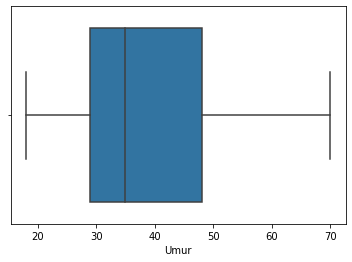

In [2]:
#code here
df = df.fillna(method='ffill')

def handling_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5

    df = df[~(df>lower_bound) | (df<upper_bound)]
    return df

df1 = handling_outliers(df[["Umur","Skor Belanja (1-100)"]])
df1.dropna(axis=0, inplace = True)
df1

sns.boxplot(x = 'Umur', data = df1)
sc = StandardScaler()
scaled_data = sc.fit_transform(df1)

scaled_df1 = pd.DataFrame(scaled_data, columns=['Umur','Skor Belanja (1-100)'])

k2 = KMeans(n_clusters=2, random_state=31).fit(scaled_df1)
scaled_df1['k2_labels'] = k2.labels_

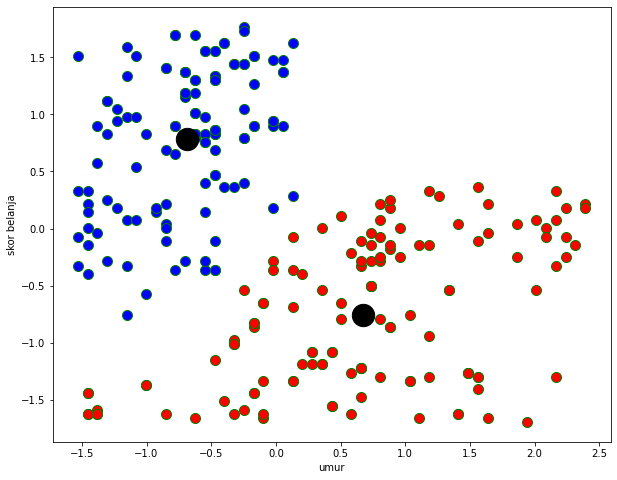

In [3]:
#n_cluster = 2
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(x=scaled_df1.Umur[scaled_df1.k2_labels == 0], y=scaled_df1['Skor Belanja (1-100)'][scaled_df1.k2_labels == 0],c='blue', s=100, edgecolor='green')
plt.scatter(x=scaled_df1.Umur[scaled_df1.k2_labels == 1], y=scaled_df1['Skor Belanja (1-100)'][scaled_df1.k2_labels == 1],c='red', s=100, edgecolor='green' )

center = k2.cluster_centers_
plt.scatter(center[:, 0], center[:, 1], c='black', s=500)
plt.xlabel('umur')
plt.ylabel('skor belanja')
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


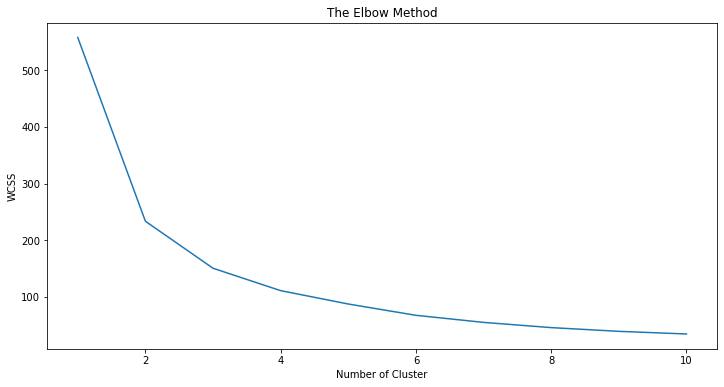

In [4]:
#Elbow method
result = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 52)
    kmeans.fit(scaled_df1)
    result.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(range(1,11), result)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

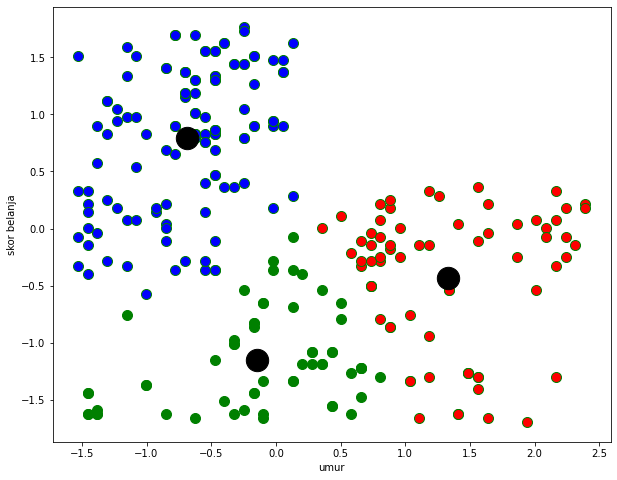

In [5]:
#n_clusters = 3
k3 = KMeans(n_clusters=3, random_state=52).fit(scaled_df1)
scaled_df1['k3_labels'] = k3.labels_

fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(x=scaled_df1.Umur[scaled_df1.k3_labels == 0], y=scaled_df1['Skor Belanja (1-100)'][scaled_df1.k3_labels == 0],c='red', s=100, edgecolor='green')
plt.scatter(x=scaled_df1.Umur[scaled_df1.k3_labels == 1], y=scaled_df1['Skor Belanja (1-100)'][scaled_df1.k3_labels == 1],c='blue', s=100, edgecolor='green')
plt.scatter(x=scaled_df1.Umur[scaled_df1.k3_labels == 2], y=scaled_df1['Skor Belanja (1-100)'][scaled_df1.k3_labels == 2],c='green', s=100, edgecolor='green' )
# plt.scatter(x=scaled_df1.Umur[scaled_df1.k3_labels == 3], y=scaled_df1['Skor Belanja (1-100)'][scaled_df1.k3_labels == 3],c='yellow', s=100, edgecolor='green' )

center = k3.cluster_centers_
plt.scatter(center[:, 0], center[:, 1], c='black', s=500)
plt.xlabel('umur')
plt.ylabel('skor belanja')
plt.show()

In [6]:
print(silhouette_score(scaled_df1, labels=scaled_df1['k2_labels']))
print(silhouette_score(scaled_df1, labels=scaled_df1['k3_labels']))

0.47956139996370395
0.6166159255188015


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Dari hasil clustering di atas dapat diketahui terdapat pembagian menjadi 3 cluster yakni cluster yang berwarna hijau merupakan cluster dengan umur yang cenderung muda dan memiliki skor belanja yang rendah. Lalu, cluster berwarna biru merupakan cluster dengan umur yang cenderung muda dan cenderung konsumtif karena memiliki skor belanja yang tinggi. Kemudian, cluster berwarna merah merupakan cluster dengan umur yang cenderung tua dan memiliki skor belanja yang rendah. Dari silhouette score juga menunjukkan bahwa pada clustering dengan n=3 memiliki nilai yang lebih tinggi sehingga lebih mudah untuk dianalisa.